## Load the Dataset  

We load the **European Stock Markets dataset** (`EuStockMarkets.csv`) using `pandas.read_csv()`.  
- `df.head()` shows the first 5 rows.  
- `df.info()` provides dataset structure (rows, columns, data types, memory usage).  
- `df.describe()` gives basic summary statistics (mean, std, min, max, quartiles).  


In [13]:
## read and load dataset into pandas
import pandas as pd
import os
os.makedirs("plots", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

df = pd.read_csv("../data/EuStockMarkets.csv")    

print(df.head())
print(df.info())
print(df.describe())


   rownames      DAX     SMI     CAC    FTSE
0         1  1628.75  1678.1  1772.8  2443.6
1         2  1613.63  1688.5  1750.5  2460.2
2         3  1606.51  1678.6  1718.0  2448.2
3         4  1621.04  1684.1  1708.1  2470.4
4         5  1618.16  1686.6  1723.1  2484.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  1860 non-null   int64  
 1   DAX       1860 non-null   float64
 2   SMI       1860 non-null   float64
 3   CAC       1860 non-null   float64
 4   FTSE      1860 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 72.8 KB
None
          rownames          DAX          SMI          CAC         FTSE
count  1860.000000  1860.000000  1860.000000  1860.000000  1860.000000
mean    930.500000  2530.656882  3376.223710  2227.828495  3565.643172
std     537.080069  1084.792740  1663.026465   580.314198   976.715540
min       1

## Data Cleaning and Indexing  

- Drop the unnecessary column `"rownames"` from the dataset.  
- Check for **missing values** using `df.isnull().sum()`.  
- Since the dataset does not contain explicit dates, create a **time index** starting from `"1991-01-01"` with business-day frequency (`"B"`).  
- Display the first 5 rows after applying these changes.  


In [14]:

# Drop the unnecessary column
df = df.drop(columns=["rownames"])

# Check for missing values
print(df.isnull().sum())

# Set an index as "time" (artificial time since dataset has no explicit dates)
df.index = pd.date_range(start="1991-01-01", periods=len(df), freq="B")  
# 'B' means business days

# Show first 5 rows
print(df.head())

DAX     0
SMI     0
CAC     0
FTSE    0
dtype: int64
                DAX     SMI     CAC    FTSE
1991-01-01  1628.75  1678.1  1772.8  2443.6
1991-01-02  1613.63  1688.5  1750.5  2460.2
1991-01-03  1606.51  1678.6  1718.0  2448.2
1991-01-04  1621.04  1684.1  1708.1  2470.4
1991-01-07  1618.16  1686.6  1723.1  2484.7


## Exploratory Data Analysis (EDA) – Initial Visualization  

- Display the **shape** of the dataset (rows × columns).  
- Print **summary statistics** such as mean, standard deviation, min, max, and quartiles.  
- Plot all four European stock indices (DAX, SMI, CAC, FTSE) over time using a line chart.  
- Label the y-axis as “Index Value” to show how each stock index evolved between **1981 and 1998**.  


dataset shape: (1860, 4)

 Summary Statistics:
               DAX          SMI          CAC         FTSE
count  1860.000000  1860.000000  1860.000000  1860.000000
mean   2530.656882  3376.223710  2227.828495  3565.643172
std    1084.792740  1663.026465   580.314198   976.715540
min    1402.340000  1587.400000  1611.000000  2281.000000
25%    1744.102500  2165.625000  1875.150000  2843.150000
50%    2140.565000  2796.350000  1992.300000  3246.600000
75%    2722.367500  3812.425000  2274.350000  3993.575000
max    6186.090000  8412.000000  4388.500000  6179.000000


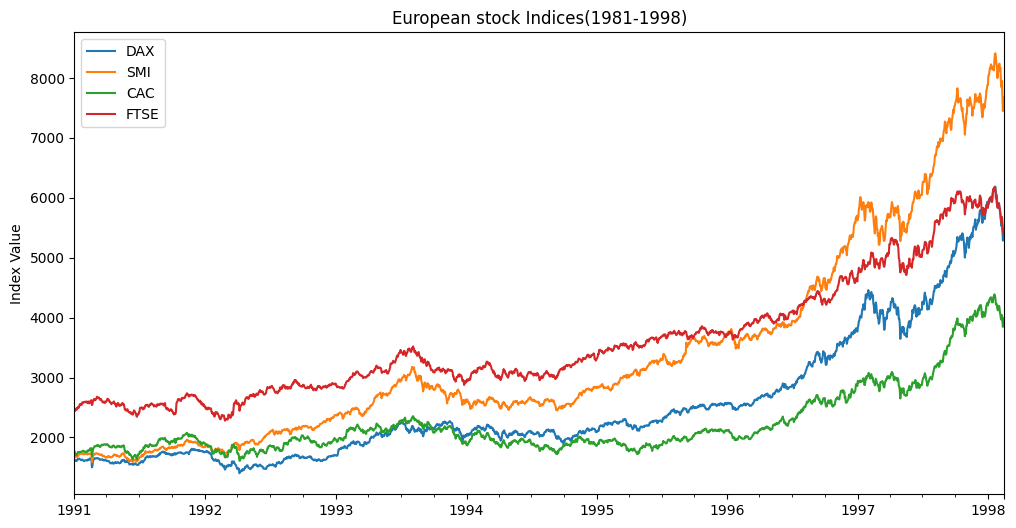

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
#Basic info about the datset 
print("dataset shape:", df.shape)
print("\n Summary Statistics:")
print(df.describe())

#plot all indices 
df.plot(figsize=(12,6),title="European stock Indices(1981-1998)")
plt.ylabel("Index Value")
plt.savefig("plots/all_indices.png", dpi=300, bbox_inches='tight')
plt.show()



## Correlation Heatmap Between European Stock Indices

In this section, we visualize the correlation between different European stock indices using a heatmap. Correlation values range from -1 to 1, where:

- **1** indicates a perfect positive correlation (indices move together),
- **-1** indicates a perfect negative correlation (indices move in opposite directions),
- **0** indicates no linear correlation.

We use Seaborn's `heatmap` function to plot the correlation matrix of the dataset.


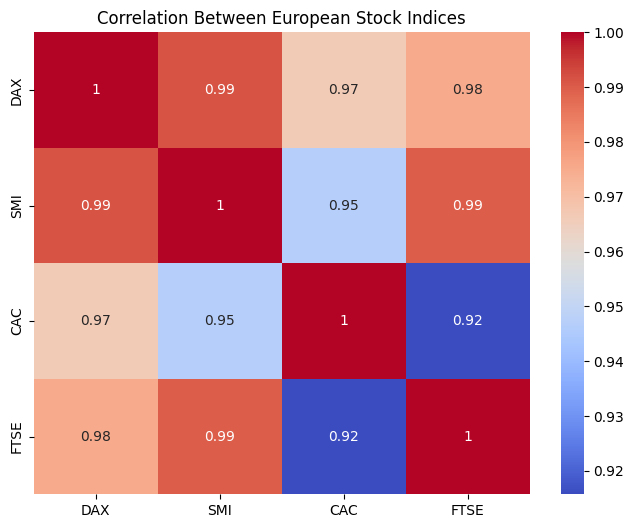

In [16]:
# Correlation heatmap between indices
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between European Stock Indices")
plt.savefig("plots/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


## Rolling Mean and Standard Deviation for DAX Index

To analyze trends and volatility in the DAX index, we calculate its **rolling statistics**:

- **Rolling Mean:** Shows the average value over a fixed window (here, 30 days), helping to identify the overall trend.  
- **Rolling Standard Deviation:** Measures the variability over the same window, indicating periods of high or low volatility.

In the plot below:  

- The **blue line** represents the original DAX index values.  
- The **red line** is the 30-day rolling mean.  
- The **green line** is the 30-day rolling standard deviation.  

This visualization helps in spotting trends and understanding how volatile the index is over time.


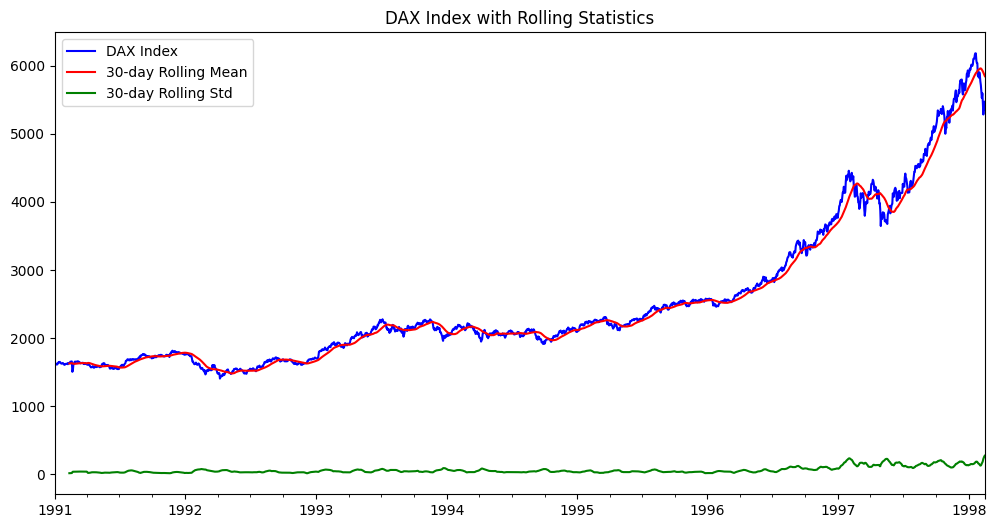

In [18]:
# Rolling mean and standard deviation for DAX index
window_size = 30
plt.figure(figsize=(12,6))
df["DAX"].plot(label="DAX Index", color="blue")
df["DAX"].rolling(window_size).mean().plot(label="30-day Rolling Mean", color="red")
df["DAX"].rolling(window_size).std().plot(label="30-day Rolling Std", color="green")
plt.legend()
plt.title("DAX Index with Rolling Statistics")
plt.savefig("plots/dax_rolling_stats.png", dpi=300, bbox_inches='tight')
plt.show()


## Augmented Dickey-Fuller (ADF) Test for Stationarity

To analyze whether each European stock index is **stationary**, we use the **Augmented Dickey-Fuller (ADF) test**. 

- A **stationary series** has a constant mean and variance over time, which is a key assumption in many time series models.  
- The **ADF test** provides:  
  - **ADF Statistic**: Test statistic to compare against critical values.  
  - **p-value**: Determines the significance of the test.

**Interpretation:**
- If the **p-value < 0.05**, we reject the null hypothesis, meaning the series **is stationary**.  
- If the **p-value ≥ 0.05**, the series **is NOT stationary** and may need differencing or other transformations.




In [20]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import os

# Ensure outputs folder exists
os.makedirs("outputs", exist_ok=True)

# Collect results
adf_results = []
for col in df.columns:
    result = adfuller(df[col])
    print(f"\n--- {col} ---")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    
    if result[1] < 0.05:
        print("The series is stationary")
        stationary = "Yes"
    else:
        print("The series is NOT stationary")
        stationary = "No"
    
    adf_results.append({
        "Index": col,
        "ADF Statistic": result[0],
        "p-value": result[1],
        "Stationary": stationary
    })

# Convert to DataFrame
adf_df = pd.DataFrame(adf_results)

# Save results
adf_df.to_csv("outputs/adf_test_results.csv", index=False)
print("\nADF test results saved to outputs/adf_test_results.csv")
print(adf_df)

    


--- DAX ---
ADF Statistic: 2.2958108025898554
p-value: 0.9989525065082031
The series is NOT stationary

--- SMI ---
ADF Statistic: 2.235031764169123
p-value: 0.9989101137185092
The series is NOT stationary

--- CAC ---
ADF Statistic: 1.286412777047598
p-value: 0.9965317660326687
The series is NOT stationary

--- FTSE ---
ADF Statistic: 0.10611636882926684
p-value: 0.9664762144355074
The series is NOT stationary

ADF test results saved to outputs/adf_test_results.csv
  Index  ADF Statistic   p-value Stationary
0   DAX       2.295811  0.998953         No
1   SMI       2.235032  0.998910         No
2   CAC       1.286413  0.996532         No
3  FTSE       0.106116  0.966476         No


## ARIMA Forecast for DAX Index

We use the **ARIMA (AutoRegressive Integrated Moving Average) model** to forecast the DAX index. ARIMA is a popular time series forecasting method that models:

- **AR (AutoRegressive) term:** Relationship between an observation and previous observations.  
- **I (Integrated) term:** Differencing applied to make the series stationary.  
- **MA (Moving Average) term:** Relationship between an observation and residual errors from a moving average model.

In this example:  
- `order=(5,1,0)` means 5 AR terms, 1 difference, and 0 MA terms.  
- We fit the model to the historical DAX data.  
- Then, we forecast the next 30 days and visualize it.

The plot shows:  
- **Blue line:** Historical DAX index values.  
- **Red line:** Forecasted values for the next 30 days.


                               SARIMAX Results                                
Dep. Variable:                    DAX   No. Observations:                 1860
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9110.410
Date:                Tue, 26 Aug 2025   AIC                          18232.821
Time:                        01:02:57   BIC                          18265.987
Sample:                    01-01-1991   HQIC                         18245.044
                         - 02-16-1998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0048      0.013      0.369      0.712      -0.021       0.030
ar.L2         -0.0089      0.013     -0.692      0.489      -0.034       0.016
ar.L3         -0.0085      0.012     -0.706      0.4

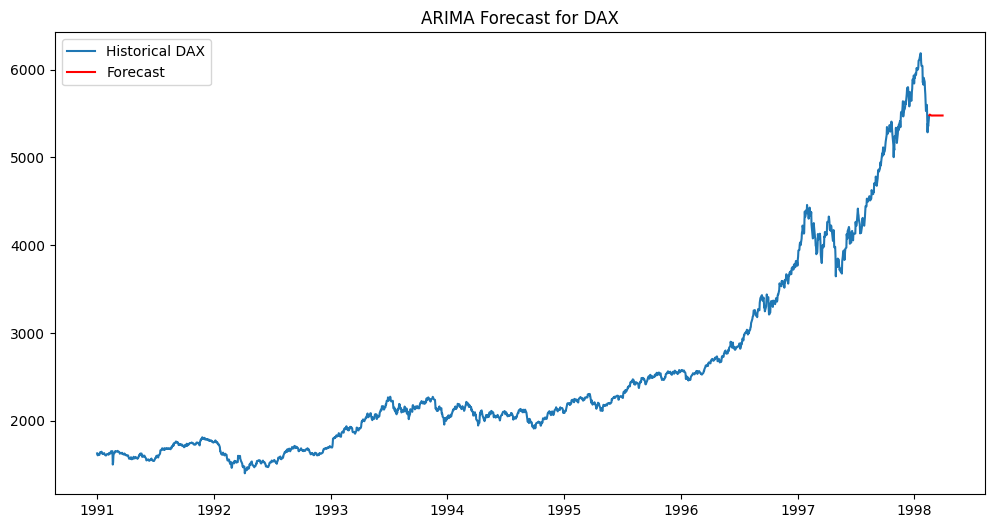

ARIMA forecast saved to outputs/dax_forecast_30days.csv


In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA on DAX
model = ARIMA(df["DAX"], order=(5,1,0))  
model_fit = model.fit()
print(model_fit.summary())

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(12,6))
plt.plot(df["DAX"], label="Historical DAX")
plt.plot(forecast, label="Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecast for DAX")
plt.savefig("plots/dax_arima_forecast.png", dpi=300, bbox_inches='tight')
plt.show()

# Save forecast to CSV
forecast_df = pd.DataFrame({"Forecast_DAX": forecast})
forecast_df.to_csv("outputs/dax_forecast_30days.csv", index=False)
print("ARIMA forecast saved to outputs/dax_forecast_30days.csv")